<a href="https://colab.research.google.com/github/Juniorffonseca/processo_seletivo/blob/main/teste_processo_seletivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** Traga insumos para validação ou refutação das seguintes hipóteses:

**1.1.** Ao longo do tempo é possível observar uma mudança na preferência de
escolha de medicamento do médico;

In [3]:
# Carregando pacotes.
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
 # Importando os 4 arquivos csv: medicos.csv, membros.csv, prescricoes.csv e visitados.csv.
uploaded = files.upload()

Saving medicos.csv to medicos.csv
Saving membros.csv to membros.csv
Saving prescricoes.csv to prescricoes.csv
Saving visitados.csv to visitados.csv


In [9]:
# Gerando uma lista com cores que serão utilizadas em todos os plots.
lista = plt.cm.plasma_r([0.9817771747683106,
                         0.19557047808372098,
                         0.63000000000000])

lista [1] = plt.cm.ocean(0.7)
lista [2] = plt.cm.Reds(0.9)

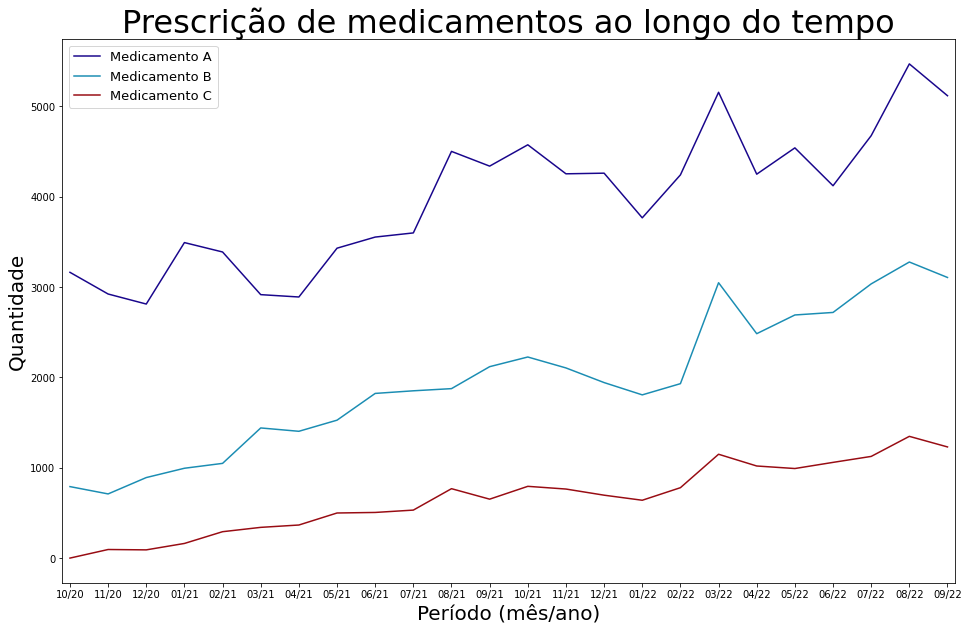

In [128]:
# Carregando o arquivo csv em uma variável.
prescricoes = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

# Agrupando colunas 'Mes_prescricao' e 'Medicamento_prescrito', contando as ocorrências em cada grupo e passando essa contagem para uma coluna chamada 'counts'.
prescricoes = prescricoes.groupby(['Mes_prescricao', 'Medicamento_prescrito']).size().reset_index(name='counts')

# Armazenando as datas no formato desejado para plotar no gráfico.
lista_datas = pd.to_datetime(prescricoes['Mes_prescricao'], format='%Y%m').dt.strftime('%m/%y').unique().tolist()

# Usando map nas concatenações ano+mes(ex: 202204) como strings e retornando como lista para a coluna 'Mes_prescricao' do df 'prescricoes'.
prescricoes['Mes_prescricao'] = list(map(str, prescricoes['Mes_prescricao']))

# Aplicando pivot para tornar 'Mes_prescricao' index e deixar apenas 'Medicamento_prescrito' como coluna.
prescricoes = prescricoes.pivot(index='Mes_prescricao', columns='Medicamento_prescrito')

# Criando o plot.
prescricoes.plot(kind = 'line', stacked = 0, figsize = (16, 10), alpha = 1, color = lista, xlim = (-0.2, len(prescricoes.index) - 0.8))

# 'Configurações' do plot (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.xticks(range(0, len(lista_datas), 1), lista_datas)
plt.title('Prescrição de medicamentos ao longo do tempo', size = 32)
plt.xlabel('Período (mês/ano)', size = 20)
plt.ylabel('Quantidade', size = 20)
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 13})

# Plotando o gráfico.
plt.show() 


Foi plotado um gráfico de linhas que mostra as mudanças de escolhas dos medicamentos prescritos ao longo dos meses, partindo de outubro de 2020 até setembro de 2022. No eixo X temos justamente todos os meses desse intervalo de tempo e no eixo Y temos a quantidade de prescrições de cada medicamento.

É possível notar que não houve mudança na preferência de escolha na prescrição de medicamento do médico, e também que todos os medicamentos estão sendo constantemente mais recomendados ao longo do tempo, seguindo padrões de crescimento bem parecidos. Isso pode se dar por diversos fatores, como, aumento frequente do número de médicos que se tornam membros, anúncios e visitas dos representantes dos medicamentos.

**1.2.** Existem outros fatores que influenciam na tomada de decisão de qual
medicamento o médico irá prescrever (geográfico e/ou especialidade médica
e/ou temporal);

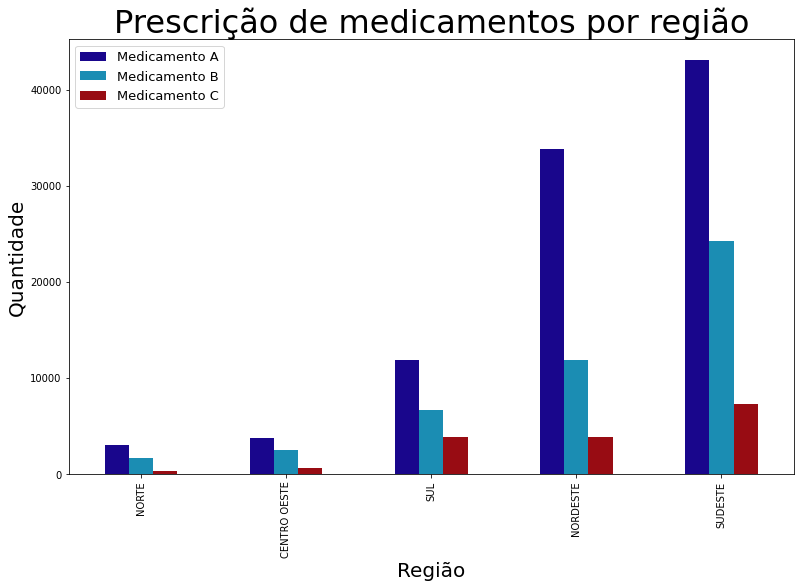

In [127]:
# Carregando o arquivo csv em uma variável.
prescricoes_2 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

# Fazendo a contagem de Medicamentos prescritos por região e passando para o dataframe, após isso reseta os indexs.
prescricoes_2 = prescricoes_2[['Medicamento_prescrito', 'Regiao']].value_counts().to_frame()
prescricoes_2 = prescricoes_2.reset_index()

# Usando map nas regiões como strings e retornando como lista para a coluna 'Regiao' do df 'prescricoes_2'.
prescricoes_2['Regiao'] = list(map(str, prescricoes_2['Regiao'])) 

# Aplicando pivot para passar 'Regiao' como index e deixar apenas 'Medicamento_prescrito' como coluna.
prescricoes_2 = prescricoes_2.pivot(index='Regiao', columns='Medicamento_prescrito')

# Criando uma coluna de média do número de medicamentos, ordenando em ordem crescente e deletando a coluna de média.
prescricoes_2['Media_medicamentos'] = prescricoes_2.mean(axis=1)
prescricoes_2 = prescricoes_2.sort_values('Media_medicamentos')
del prescricoes_2['Media_medicamentos']

# Criando o plot.
prescricoes_2.plot(kind = 'bar', stacked = 0, figsize = (13, 8), alpha = 1, color = lista)

# 'Configurações' do plot (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrição de medicamentos por região', size = 32)
plt.xlabel('Região', size = 20)
plt.ylabel('Quantidade', size = 20)
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 13})

# Plotando o gráfico.
plt.show()


Há um padrão que se mantém em praticamente todas as regiões, o medicamento A é o mais prescrito seguido pelo medicamento B enquanto o C é o menos prescrito. Esse gráfico traz informações que refutam, até então de forma parcial, a hipótese de que existiria um fator geográfico que influencia na tomada de decisão dos médicos ao prescrever medicamentos.

Uma observação relevante é que na região Nordeste e na região Sul, embora os medicamentos A e B tenham uma grande diferença em números de prescrições, o mesmo não se nota no medicamento C que se mantém quase no mesmo patamar nas duas regiões. Não é possível dizer que isso afete a preferência de prescrição mas é uma exceção importante a se notar.

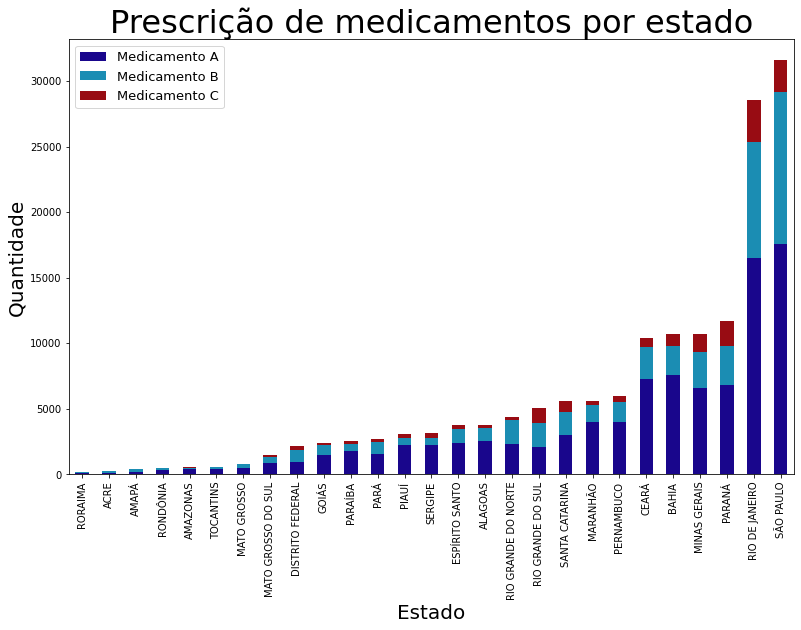

In [130]:
# Carregando o arquivo csv em uma variável.
prescricoes_3 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

# Fazendo a contagem de Medicamentos prescritos por estado e passando para o dataframe, após isso reseta os indexs.
prescricoes_3 = prescricoes_3[['Medicamento_prescrito', 'Estado']].value_counts().to_frame()
prescricoes_3 = prescricoes_3.reset_index()

# Usando map nos estados como strings e retornando como lista para a coluna 'Estado' do df 'prescricoes_3'.
prescricoes_3['Estado'] = list(map(str, prescricoes_3['Estado']))

# Aplicando pivot para passar 'Estado' como index e deixar apenas 'Medicamento_prescrito' como coluna.
prescricoes_3 = prescricoes_3.pivot(index='Estado', columns='Medicamento_prescrito')

# Criando uma coluna de média do número de medicamentos, ordenando em ordem crescente e deletando a coluna de média.
prescricoes_3['Media_medicamentos'] = prescricoes_3.mean(axis=1)
prescricoes_3 = prescricoes_3.sort_values('Media_medicamentos')
del prescricoes_3['Media_medicamentos']

# Criando o plot.
prescricoes_3.plot(kind = 'bar', stacked = 1, figsize = (13, 8), alpha = 1, color = lista) 

# 'Configurações' do plot (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrição de medicamentos por estado', size = 32)
plt.xlabel('Estado', size = 20)
plt.ylabel('Quantidade', size = 20)
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 13})

# Plotando o gráfico.
plt.show()


Contrastando as informações obtidas na plotagem anterior e refutando, agora por completo, a hipótese de influência geográfica na escolha de medicamentos, nessa plotagem dos estados podemos notar o mesmo padrão visto anteriormente.

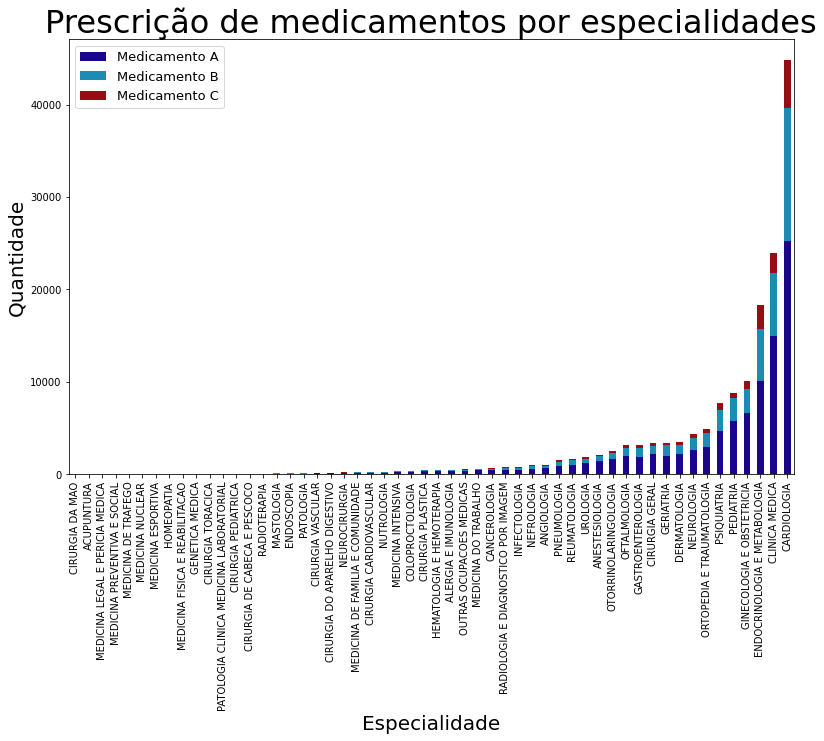

In [131]:
# Carregando o arquivo csv em uma variável.
prescricoes_4 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

# Fazendo a contagem de Medicamentos prescritos por especialidades e passando para dataframe, após isso reseta os indexs.
prescricoes_4 = prescricoes_4[['Medicamento_prescrito', 'Especialidade']].value_counts().to_frame() 
prescricoes_4 = prescricoes_4.reset_index()

# Usando map nas especialidades como strings e retornando como lista para a coluna 'Especialidade' do df 'prescricoes_4'.
prescricoes_4['Especialidade'] = list(map(str, prescricoes_4['Especialidade'])) 

# Transformando a coluna de Especialidades em Indexs e deixando apenas os Medicamentos como colunas.
prescricoes_4 = prescricoes_4.pivot(index='Especialidade', columns='Medicamento_prescrito') 

# Criando uma coluna de média do número de medicamentos, ordenando em ordem crescente e deletando a coluna de média.
prescricoes_4['Media_medicamentos'] = prescricoes_4.mean(axis=1)
prescricoes_4 = prescricoes_4.sort_values('Media_medicamentos')
del prescricoes_4['Media_medicamentos']

# Criando o plot.
prescricoes_4.plot(kind = 'bar', stacked = 1, figsize = (13, 8), alpha = 1, color = lista)

# 'Configurações' do plot (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrição de medicamentos por especialidades', size = 32)
plt.xlabel('Especialidade', size = 20)
plt.ylabel('Quantidade', size = 20)
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 13})

# Plotando o gráfico.
plt.show()


Não há indicíos de que a especialidade do médico cause uma preferência diferente para o tipo de medicamento prescrito. O padrão que é notado anteriomento tanto na prescrição dos medicamentos ao longo do tempo quanto por estados e regiões também é notado aqui.

**1.3.** Existe uma relação sazonal na escolha do médico pelos medicamentos;

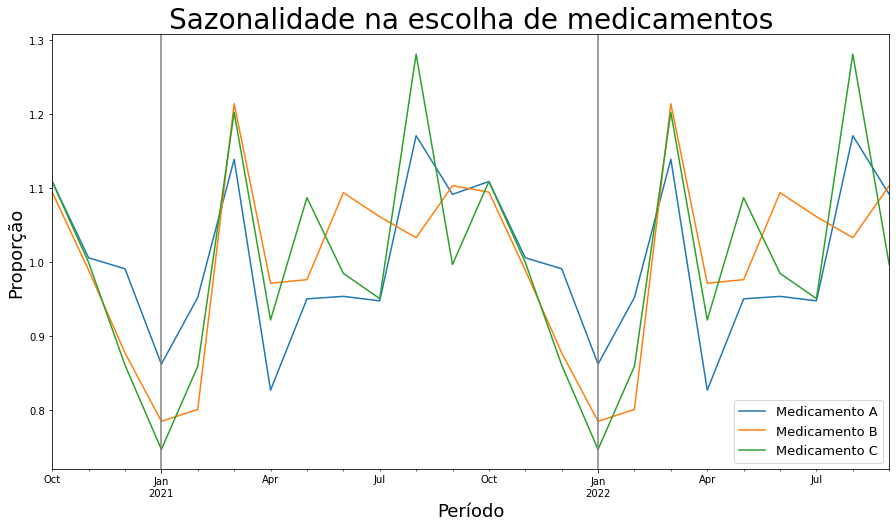

In [132]:
# Carregando o arquivo csv em uma variável.
prescricoes_5 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

# Passando a coluna 'Mes_prescricao' para data
prescricoes_5['Mes_prescricao'] = pd.to_datetime(prescricoes_5['Mes_prescricao'], format='%Y%m')

# Criando 3 dataframes, um para cada medicamento
prescricoes_5_a = prescricoes_5[prescricoes_5['Medicamento_prescrito'] == 'MEDICAMENTO A']
prescricoes_5_b = prescricoes_5[prescricoes_5['Medicamento_prescrito'] == 'MEDICAMENTO B']
prescricoes_5_c = prescricoes_5[prescricoes_5['Medicamento_prescrito'] == 'MEDICAMENTO C']

# Fazendo groupby nos 3 dataframes, usando a função Grouper para informar a coluna que servirá como 'key' e a frequência 'M' que seria de Mês, e por fim é feita a contagem de cada medicamento prescrito.
prescricoes_5_a = prescricoes_5_a.groupby(pd.Grouper(key = 'Mes_prescricao', freq='M'))['Medicamento_prescrito'].count()
prescricoes_5_b = prescricoes_5_b.groupby(pd.Grouper(key = 'Mes_prescricao', freq='M'))['Medicamento_prescrito'].count()
prescricoes_5_c = prescricoes_5_c.groupby(pd.Grouper(key = 'Mes_prescricao', freq='M'))['Medicamento_prescrito'].count()

# 'Configurações' dos 3 plots (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
result_a = seasonal_decompose(prescricoes_5_a, model='multiplicative', period=12).seasonal
result_b = seasonal_decompose(prescricoes_5_b, model='multiplicative', period=12).seasonal
result_c = seasonal_decompose(prescricoes_5_c, model='multiplicative', period=12).seasonal
ax_a = result_a.plot(figsize = (15, 8), label = 'Medicamento A')
ax_b = result_b.plot(ax = ax_a, label = 'Medicamento B')
ax_c = result_c.plot(ax = ax_b, label = 'Medicamento C')
plt.title('Sazonalidade na escolha de medicamentos', size = 28)
plt.xlabel('Período', size = 18)
plt.ylabel('Proporção', size = 18)
plt.axvline(x = '2021-01-31',  color = 'gray') 
plt.axvline(x = '2022-01-31',  color = 'gray') 
plt.legend(loc = 'best', prop={'size': 13})

# Plotando o gráfico.
plt.show()

É notável uma relação entre sazonalidade e escolha dos medicamentos no mês de Agosto, quando houve um aumento maior da proporção de prescrições do medicamento A e C enquanto o medicamento B teve um aumento consideravelmente menor de sua prescrição comparado aos outros dois. É um padrão que pode ser visto inicialmente em Agosto de 2021 e que se repete em Agosto de 2022.

Outra relação de sazonalidade acontece nos meses de Maio, onde foi possível observar um padrão maior de aumento na prescrição dos medicamentos A e C e novamente o medicamento B não cresce tanto quanto os demais nesse mesmo período.

No mês de Junho o Medicamento C tem um declínio na sua quantidade de prescrições enquanto o medicamento B tem uma grande elevação e o medicamento A quase não sofre alterações nesse mesmo período.

É importante notar que esse gráfico mostra a relação dos aumentos na prescrição de cada medicamento relacionando cada um consigo  mesmo, ou seja, não são valores absolutos. Quando um medicamento tem um aumento na prescrição maior que os outros em algum período de tempo não necessariamente ele está sendo mais prescrito que os outros.

**1.4.** Existe relação entre tornar-se membro da comunidade e/ou ser visitado com
o número de prescrições para cada um dos medicamentos;


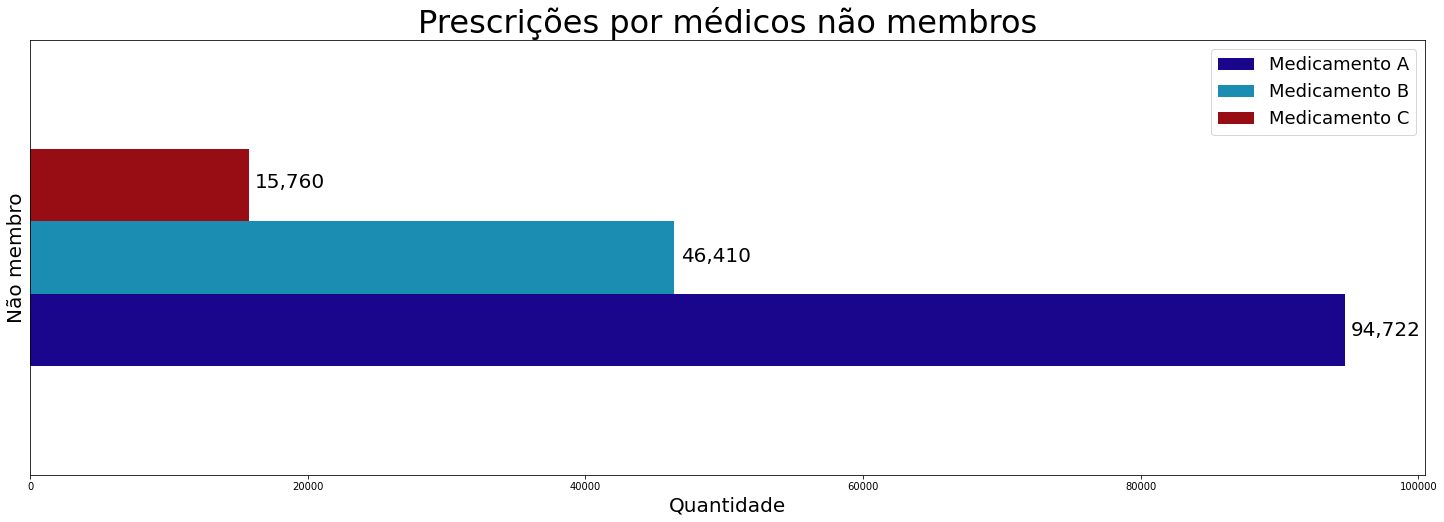

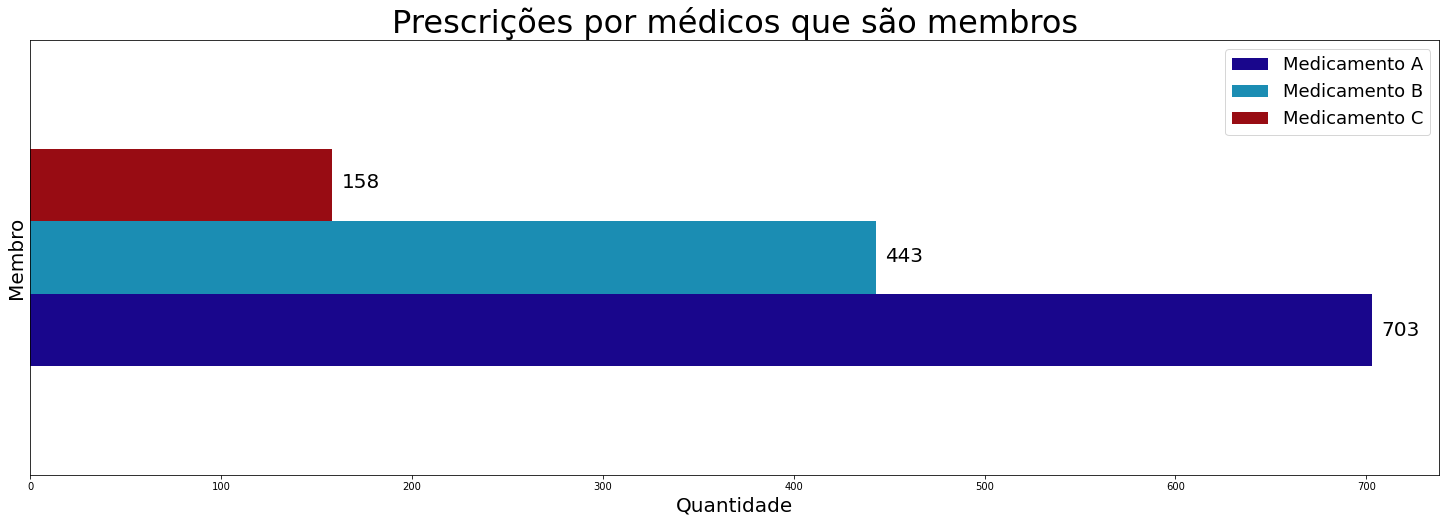

In [144]:
# Carregando os arquivos csv em duas variáveis.
membros = pd.read_csv('membros.csv', sep = ';', encoding = 'latin-1')
prescricoes_6 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')

# Criando uma coluna 'membro' que diz se o médico é membro caso o 'ID_MEDICO' do df prescricoes esteja contido em membros.
prescricoes_6['membro'] = np.where(prescricoes_6['ID_MEDICO'].isin(membros['ID_MEDICO']), 'Sim', 'Não')

prescricoes_6_membro = prescricoes_6[prescricoes_6['membro'] == 'Sim']
prescricoes_6 = prescricoes_6[prescricoes_6['membro'] == 'Não']

# Fazendo a contagem de Medicamentos prescritos por os que não são membros, passando para dataframe e resetando os indexs.
prescricoes_6 = prescricoes_6[['Medicamento_prescrito', 'membro']].value_counts().to_frame() 
prescricoes_6 = prescricoes_6.reset_index()

prescricoes_6['membro'] = list(map(str, prescricoes_6['membro']))

prescricoes_6 = prescricoes_6.pivot(index='membro', columns='Medicamento_prescrito')

# Criando o gráfico dos que não são membros.
prescricoes_6.plot(kind = 'barh', stacked = 0, figsize = (25, 8), alpha = 1, color = lista, xlim = (0, 100500))

# 'Configurações' do plot1 (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrições por médicos não membros', size = 32)
plt.xlabel('Quantidade', size = 20)
plt.ylabel('Não membro', size = 20)
plt.yticks([],[])
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 18})

# Adicionando textos em cada barra do gráfico por meio de dois laços for que irão iterar em cada barra e em cada valor das colunas para saber os valores das contagens.
for j in range(3):
  label = format(int(prescricoes_6.iloc[0, j]), ',')
  plt.annotate(label, xy=(prescricoes_6.iloc[0, j] + 450, -0.18 + 0.17 * j), fontsize = 20)

# Plotando o 1° gráfico.
plt.show()

# Separando os gráficos
print('')

# Fazendo a contagem de Medicamentos prescritos por membros e passando para dataframe, após isso reseta os indexs.
prescricoes_6_membro = prescricoes_6_membro[['Medicamento_prescrito', 'membro']].value_counts().to_frame() 
prescricoes_6_membro = prescricoes_6_membro.reset_index()

# Usando map nas membros como strings e retornando como lista para a coluna 'membro' do df 'prescricoes_6'.
prescricoes_6_membro['membro'] = list(map(str, prescricoes_6_membro['membro'])) 

# Transformando a coluna de membros em Indexs e deixando apenas os Medicamentos como colunas.
prescricoes_6_membro = prescricoes_6_membro.pivot(index='membro', columns='Medicamento_prescrito')

prescricoes_6_membro.plot(kind = 'barh', stacked = 0, figsize = (25.25, 8), alpha = 1, color = lista)

# 'Configurações' do plot2 (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrições por médicos que são membros', size = 32)
plt.xlabel('Quantidade', size = 20)
plt.ylabel('Membro', size = 20)
plt.yticks([],[])
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 18})

# Adicionando textos em cada barra do gráfico por meio de dois laços for que irão iterar em cada barra e em cada valor das colunas para saber os valores das contagens.
for j in range(3):
  label = format(int(prescricoes_6_membro.iloc[0, j]), ',')
  plt.annotate(label, xy=(prescricoes_6_membro.iloc[0, j] + 5, -0.18 + 0.17 * j), fontsize = 20)

# Plotando o 2° gráfico.
plt.show()

Nesses dois gráficos é possível ver os valores absolutos de medicamentos prescritos considerando se é membro ou não.

Há um leve aumento nas prescrições do medicamento B e medicamento C dos que são membros em relação aos que não são, aproximadamente 2,1% e 4,4%, respectivamente. Enquanto o medicamento A sofre um declinio nas prescrições de aproximadamente 6,1%. 

Vale notar que esses valores percentuais estão baseados nos números totais específicos de cada caso, ou seja, dos que são membros e dos que não são.

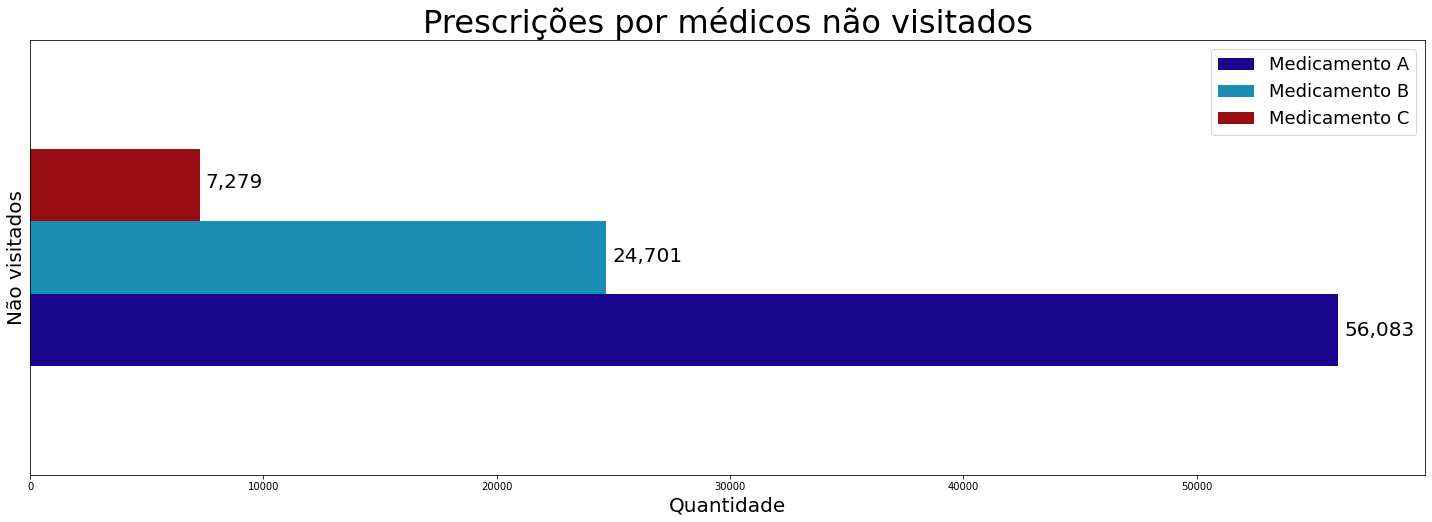

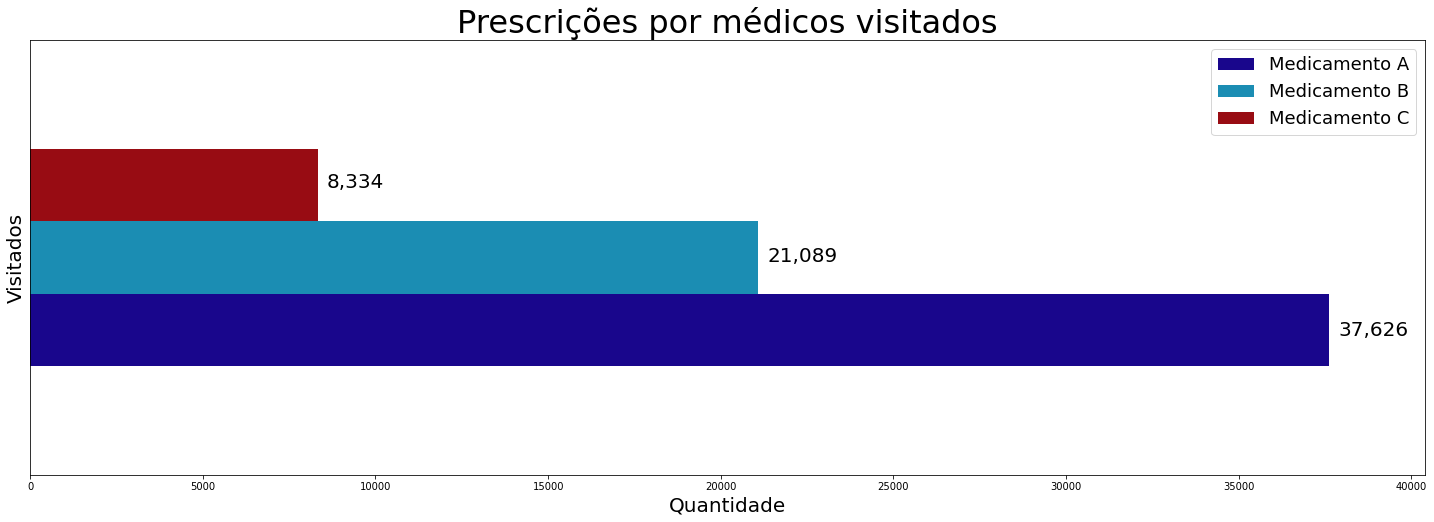

In [145]:
# Carregando os arquivos csv em duas variáveis.
visitados = pd.read_csv('visitados.csv', sep = ';', encoding = 'latin-1')
prescricoes_7 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')

prescricoes_7 = prescricoes_7.merge(visitados, on='ID_MEDICO', how='left')

prescricoes_7.dropna(inplace = True)

prescricoes_7_visitado = prescricoes_7[prescricoes_7['VISITADO'] == 'SIM']
prescricoes_7 = prescricoes_7[prescricoes_7['VISITADO'] == 'NÃO']

# Fazendo a contagem de Medicamentos prescritos por médicos visitados e passando para dataframe, após isso reseta os indexs.
prescricoes_7 = prescricoes_7[['Medicamento_prescrito', 'VISITADO']].value_counts().to_frame() 
prescricoes_7 = prescricoes_7.reset_index()

# Usando map nas membros como strings e retornando como lista para a coluna 'VISITADO' do df 'prescricoes_7'.
prescricoes_7['VISITADO'] = list(map(str, prescricoes_7['VISITADO']))

# Transformando a coluna 'VISITADO' em Indexs e deixando apenas os Medicamentos como colunas.
prescricoes_7 = prescricoes_7.pivot(index='VISITADO', columns='Medicamento_prescrito') 

# Criando o plot.
prescricoes_7.plot(kind = 'barh', stacked = 0, figsize = (25, 8), alpha = 1, color = lista, xlim = (0, 59800)) 



# 'Configurações' do plot1 (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrições por médicos não visitados', size = 32)
plt.xlabel('Quantidade', size = 20)
plt.ylabel('Não visitados', size = 20)
plt.yticks([],[])
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 18})

# Adicionando textos em cada barra do gráfico por meio de dois laços for que irão iterar em cada barra e em cada valor das colunas para saber os valores das contagens.
for j in range(3):
  label = format(int(prescricoes_7.iloc[0, j]), ',')
  plt.annotate(label, xy=(prescricoes_7.iloc[0, j] + 250, -0.18 + 0.17 * j), fontsize = 20)

# Plotando o 1° gráfico.
plt.show()

# Separando os gráficos
print('')

# Fazendo a contagem de Medicamentos prescritos por visitados, passando para dataframe e resetando os indexs.
prescricoes_7_visitado = prescricoes_7_visitado[['Medicamento_prescrito', 'VISITADO']].value_counts().to_frame() 
prescricoes_7_visitado = prescricoes_7_visitado.reset_index()

# Usando map nas membros como strings e retornando como lista para a coluna 'Especialidade' do df 'prescricoes_4'.
prescricoes_7_visitado['VISITADO'] = list(map(str, prescricoes_7_visitado['VISITADO'])) 

# Transformando a coluna de visitado em Indexs e deixando apenas os Medicamentos como colunas.
prescricoes_7_visitado = prescricoes_7_visitado.pivot(index='VISITADO', columns='Medicamento_prescrito') 

prescricoes_7_visitado.plot(kind = 'barh', stacked = 0, figsize = (25, 8), alpha = 1, color = lista, xlim = (0, 40400))

# 'Configurações' do plot2 (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrições por médicos visitados', size = 32)
plt.xlabel('Quantidade', size = 20)
plt.ylabel('Visitados', size = 20)
plt.yticks([],[])
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 18})

# Adicionando textos em cada barra do gráfico por meio de dois laços for que irão iterar em cada barra e em cada valor das colunas para saber os valores das contagens.
for j in range(3):
  label = format(int(prescricoes_7_visitado.iloc[0, j]), ',')
  plt.annotate(label, xy=(prescricoes_7_visitado.iloc[0, j] + 250, -0.18 + 0.17 * j), fontsize = 20)

# Plotando o 2° gráfico.
plt.show()

Os dois gráficos obtidos nessa célula parecem bastante com os outros dois gráficos obtidos ao comparar médicos que não são membros e os que são.

Assim como naqueles, podemos notar a mesma tendência. Entre os visitados há um aumento de aproximadamente 4% e 3% nos medicamentos C e B, respectivamente, além da mesma tendência a menos prescrições do medicamento A (quem é visitado prescreve 7% menos o medicamento A).

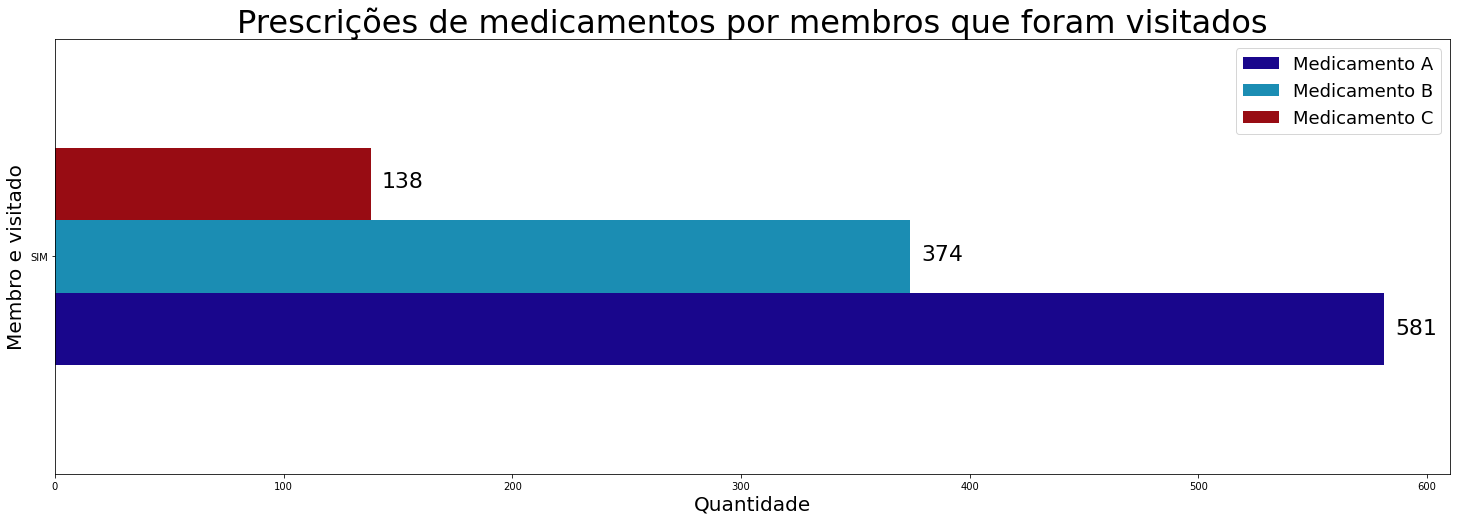

In [147]:
# Carregando os arquivos csv em duas variáveis.
membros_2 = pd.read_csv('membros.csv', sep = ';', encoding = 'latin-1')
visitados_2 = pd.read_csv('visitados.csv', sep = ';', encoding = 'latin-1')
prescricoes_8 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')

# Criando uma coluna 'membro' que diz se o médico é membro caso o 'ID_MEDICO' do df prescricoes esteja contido em membros.
prescricoes_8 = membros_2.merge(prescricoes_8, on='ID_MEDICO', how='inner').merge(visitados_2, on='ID_MEDICO', how='inner')
prescricoes_8 = prescricoes_8[prescricoes_8['VISITADO'] == 'SIM']

# Fazendo a contagem de Medicamentos prescritos por os que são membros e foram visitados, passando para dataframe e resetando os indexs.
prescricoes_8 = prescricoes_8[['Medicamento_prescrito', 'VISITADO']].value_counts().to_frame() 
prescricoes_8 = prescricoes_8.reset_index()

prescricoes_8['VISITADO'] = list(map(str, prescricoes_8['VISITADO']))

prescricoes_8 = prescricoes_8.pivot(index='VISITADO', columns='Medicamento_prescrito')

# Criando o gráfico dos que não são membros.
prescricoes_8.plot(kind = 'barh', stacked = 0, figsize = (25, 8), alpha = 1, color = lista)

# 'Configurações' do plot (frequência dos ticks no eixo x, título, conteúdo das labels, tamanhos das fontes, legenda etc).
plt.title('Prescrições de medicamentos por membros que foram visitados', size = 32)
plt.xlabel('Quantidade', size = 20)
plt.ylabel('Membro e visitado', size = 20)
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], loc = 'best', prop={'size': 18})

# Adicionando textos em cada barra do gráfico por meio de dois laços for que irão iterar em cada barra e em cada valor das colunas para saber os valores das contagens.
for j in range(3):
  label = format(int(prescricoes_8.iloc[0, j]), ',')
  plt.annotate(label, xy=(prescricoes_8.iloc[0, j] + 5, -0.18 + 0.17 * j), fontsize = 22)

# Plotando o gráfico
plt.show()

Esse gráfico mostra as prescrições de quem é membro e foi visitado. Há um aumento dos medicamentos B e C e um recuo do medicamento A em comparação aos dados de quem apenas é membro ou quem foi visitado. É possível notar que ambos os fatores influenciam nas escolhas das prescrições e juntos causam uma influência ainda maior.

**2.** Faça um relatório para ser acompanhado semanalmente com os principais
indicadores que julgar relevantes e que demonstre o impacto da comunidade nas
prescrições.


# **Relatório semanal**

Esse relatório feito por meio da linguagem de programação Python leva em conta os principais indicadores que devem ser analisados semanalmente para entender melhor o impacto da comunidade de médicos nas prescrições.

A primeira informação que deve ser analisada é: de onde vem as informações que serão analisadas? Nesse caso, de onde vem as estatísticas sobre escolha de prescrições? Para entender melhor isso foi gerado um histograma que descreve a frequência de prescrições para cada médico.

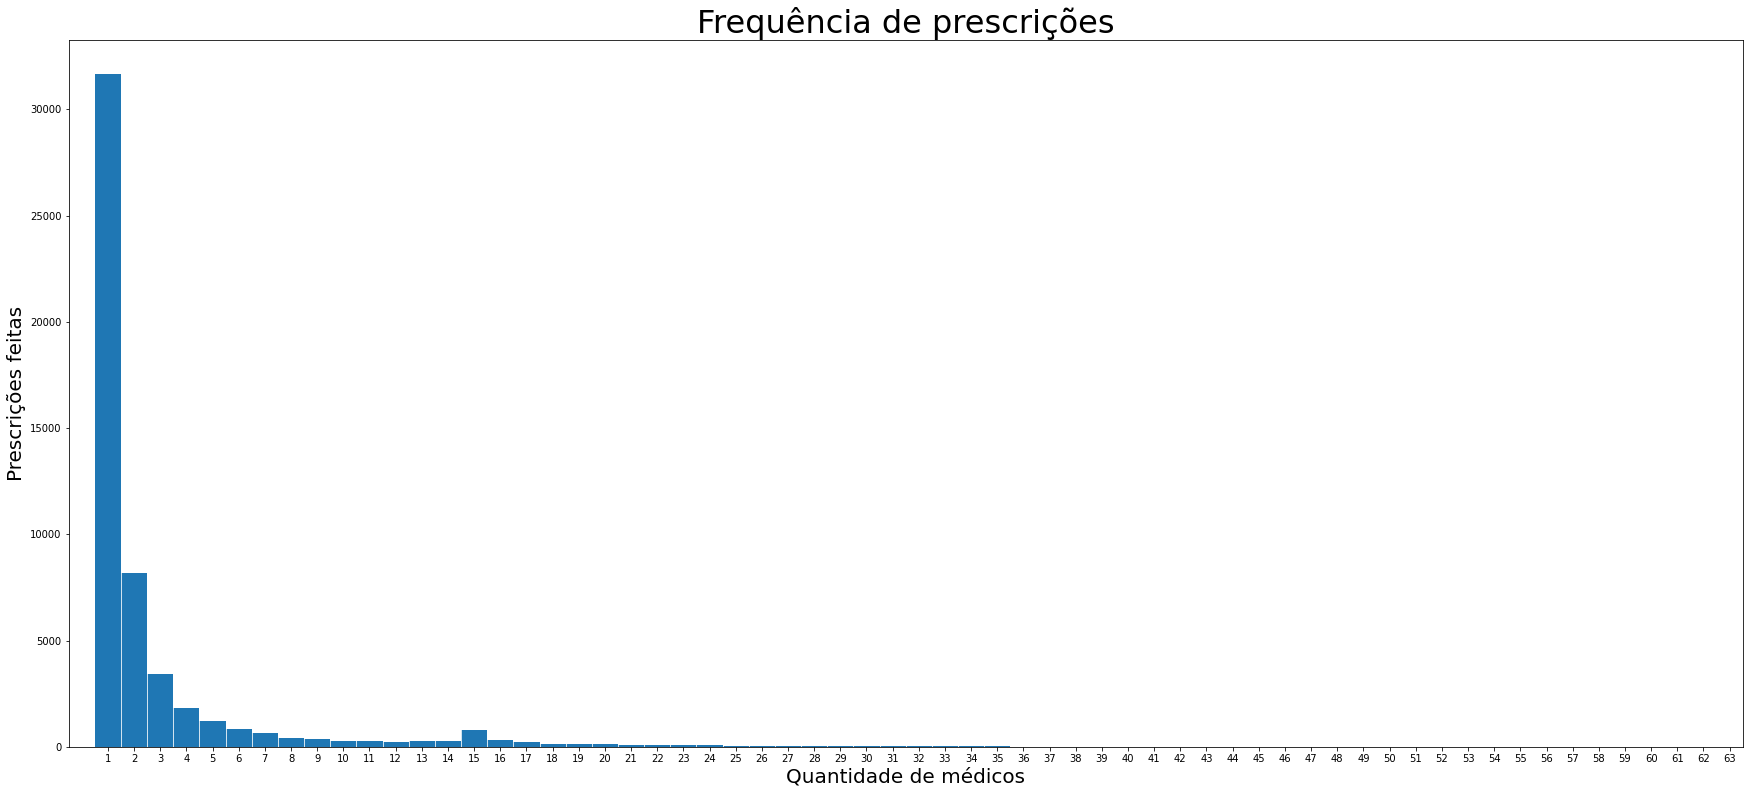

In [150]:
# Carregando os arquivos csv em variáveis.
medicos = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')
visitados_3 = pd.read_csv('visitados.csv', sep = ';', encoding = 'latin-1')
membros_3 = pd.read_csv('membros.csv', sep = ';', encoding = 'latin-1')
prescricoes_9 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')

# Calculando a taxa de prescrição por médico.
taxa_prescricao = prescricoes_9.groupby('ID_MEDICO').size().reset_index(name='prescricoes')

# Configurando o gráfico.
counts, limites_barras = np.histogram(taxa_prescricao['prescricoes'].transpose(), bins = 62)
taxa_prescricao['prescricoes'].transpose().plot( kind = 'hist', bins=62, figsize = (30, 13), xlim = (0, 64))
plt.xticks(limites_barras + 0.5, list(map(int, limites_barras)))
plt.xlabel('Quantidade de médicos', size = 20)
plt.ylabel('Prescrições feitas', size = 20)
plt.title('Frequência de prescrições', size = 32)

# Criando separação entre cada barra.
for i in range(1, len(limites_barras)):
    plt.axvline(limites_barras[i], 0, color = 'white', linewidth = 0.8)

# Plotando o gráfico.
plt.show()


Nesse histograma podemos ver a quantidade de médicos em várias faixas de frequência de prescrições.

Mais de 40.000 médicos prescreveram menos que 5 vezes. O número total de médicos que fizeram prescrições é de 52592. Sendo assim, a maior parte (mais de 75%) das informações sobre prescrições partem desse grupo.

In [ ]:
#parei aqui
#ideia q preciso testar:
#criar funções para o relatório semanal, onde seria possível apenas passar como parâmetros os novos dados semanais tornando ainda mais automatizado todo o processo.